In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import psycopg2 
import os

In [3]:
DB_HOST = "localhost" 
DB_PORT = 5433 
DB_NAME = "market_analysis" 
DB_USER = "amitv" 
DB_PASSWORD = "hihello@24" 

In [4]:
def get_connection(): 
    return psycopg2.connect( 
        host=DB_HOST, 
        port=DB_PORT, 
        dbname=DB_NAME, 
        user=DB_USER, 
        password=DB_PASSWORD 
    )

In [5]:
def load_table(table_name): 
    conn = get_connection() 
    df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn) 
    conn.close() 
    return df

In [6]:
customer_features = load_table("dim_customer_features") 
print(f"Loaded {len(customer_features)} rows from dim_customer_features") 
customer_features.head()

Loaded 4372 rows from dim_customer_features


/var/folders/rz/rhs0qbtn20570qt0xxkr8pgw0000gn/T/ipykernel_36231/2491019117.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)


,customerid,totalspend,numorders,avgordervalue,recencydays
0,12346.0,0.00,2,0.000000,325
1,12347.0,4310.00,7,615.714286,1
2,12348.0,1797.24,4,449.310000,74
3,12349.0,1757.55,1,1757.550000,18
4,12350.0,334.40,1,334.400000,309


In [7]:
customer_clusters = load_table("dim_customer_clusters") 
print(f"Loaded {len(customer_clusters)} rows from dim_customer_clusters") 
customer_clusters.head()

Loaded 4372 rows from dim_customer_clusters


/var/folders/rz/rhs0qbtn20570qt0xxkr8pgw0000gn/T/ipykernel_36231/2491019117.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)


,customerid,totalspend,numorders,avgordervalue,recencydays,cluster
0,12346,0.00,2,0.000000,325,1
1,12347,4310.00,7,615.714286,1,0
2,12348,1797.24,4,449.310000,74,0
3,12349,1757.55,1,1757.550000,18,0
4,12350,334.40,1,334.400000,309,1


In [9]:
customer_clusters.describe() 
# Distribution of TotalSpend 
plt.figure(figsize=(8,5)) 
sns.histplot(customer_clusters['TotalSpend'], bins=50, kde=True)
plt.title("Distribution of Total Spend") 
plt.xlabel("Total Spend") 
plt.ylabel("Frequency") 
plt.show()

KeyError: 'TotalSpend'

<Figure size 800x500 with 0 Axes>

In [10]:
print(customer_clusters.columns)

Index(['customerid', 'totalspend', 'numorders', 'avgordervalue', 'recencydays',
       'cluster'],
      dtype='object')


<Axes: xlabel='totalspend', ylabel='Count'>

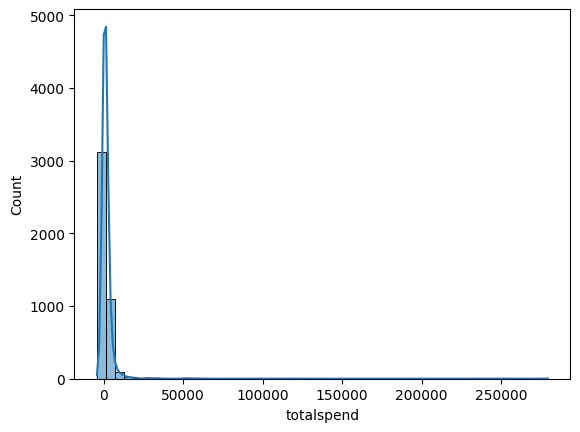

In [11]:
sns.histplot(customer_clusters['totalspend'], bins=50, kde=True)

In [12]:
customer_clusters.columns = [col.lower() for col in customer_clusters.columns]

<Axes: xlabel='totalspend', ylabel='Count'>

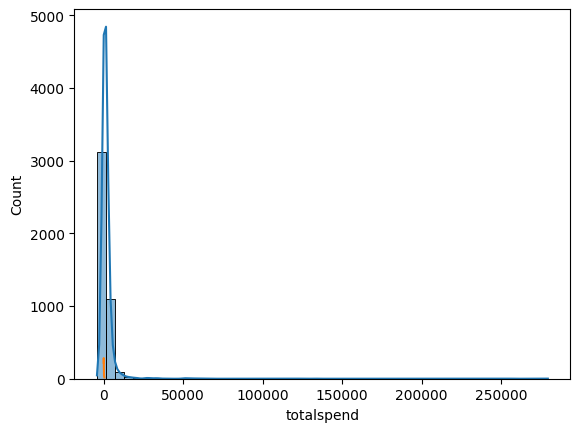

In [13]:
sns.histplot(customer_clusters['totalspend'], bins=50, kde=True)
sns.histplot(customer_clusters['recencydays'], bins=50, kde=True)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

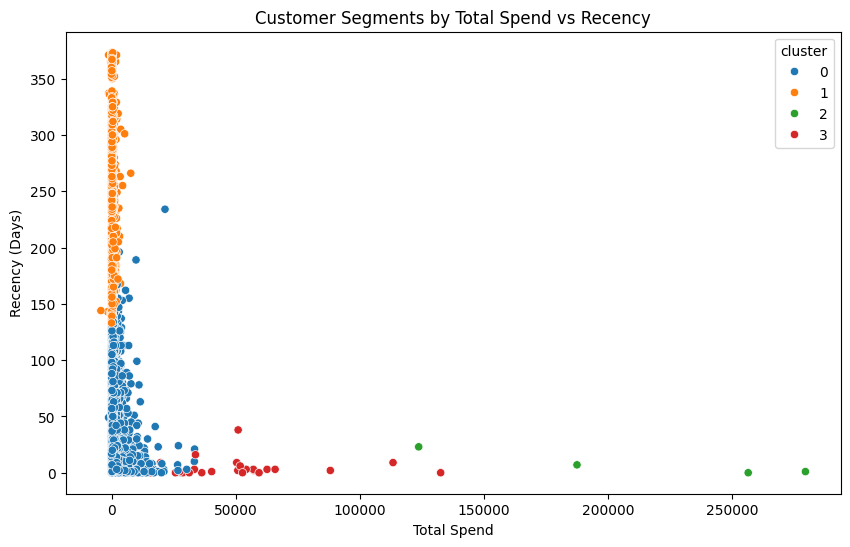

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='totalspend',
    y='recencydays',
    hue='cluster',
    palette='tab10',
    data=customer_clusters
)
plt.title("Customer Segments by Total Spend vs Recency")
plt.xlabel("Total Spend")
plt.ylabel("Recency (Days)")
plt.show()

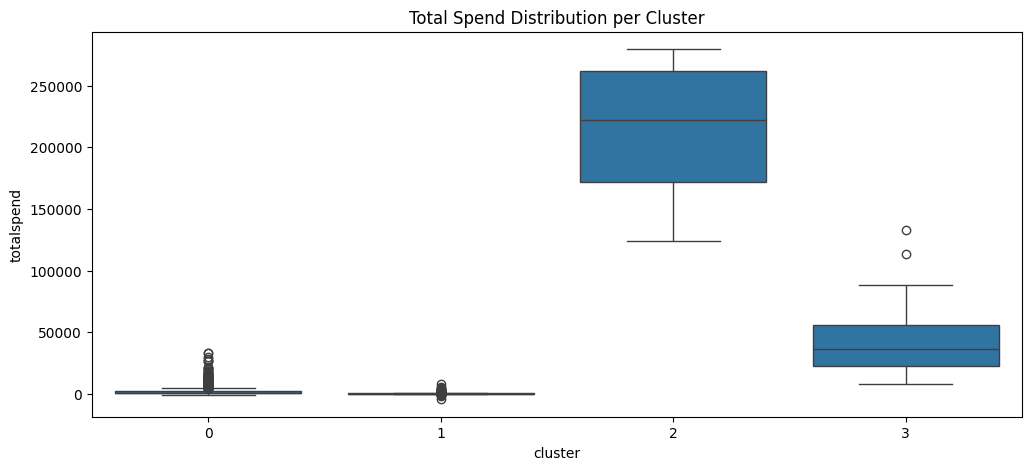

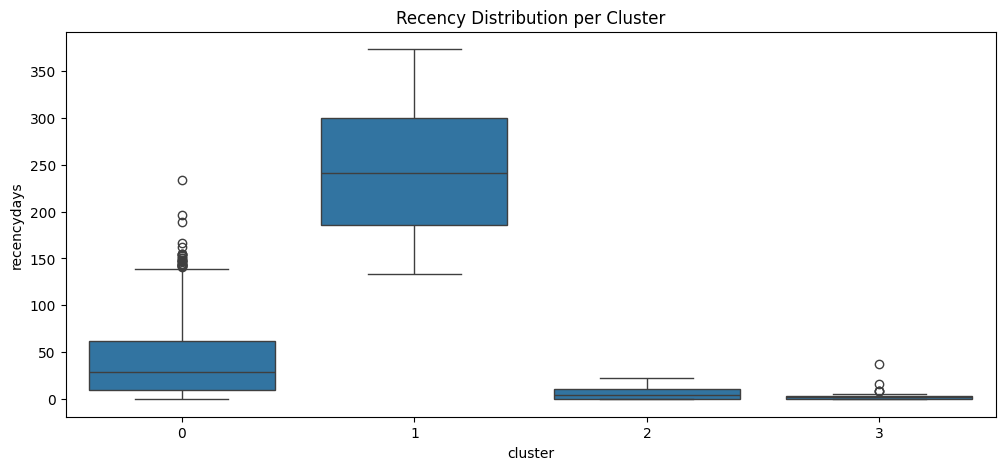

In [18]:
plt.figure(figsize=(12,5))
sns.boxplot(x='cluster', y='totalspend', data=customer_clusters)
plt.title("Total Spend Distribution per Cluster")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='cluster', y='recencydays', data=customer_clusters)
plt.title("Recency Distribution per Cluster")
plt.show()

In [19]:
cluster_summary = customer_clusters.groupby('cluster').agg({
    'totalspend': ['mean', 'median', 'sum'],
    'numorders': ['mean', 'sum'],
    'avgordervalue': 'mean',
    'recencydays': ['mean', 'median']
}).reset_index()

cluster_summary

cluster     totalspend                           numorders         \
                    mean      median          sum       mean    sum   
0       0    1744.084233     901.715  5654321.083   5.429056  17601   
1       1     408.064759     290.360   446830.911   1.851142   2027   
2       2  211783.782500  221960.330   847135.130  55.000000    220   
3       3   43605.764194   36351.420  1351778.690  75.548387   2342   

  avgordervalue recencydays         
           mean        mean median  
0    333.258283   39.651141   29.0  
1    236.585124  245.989041  241.0  
2   3983.317523    7.750000    4.0  
3    826.610387    3.870968    2.0

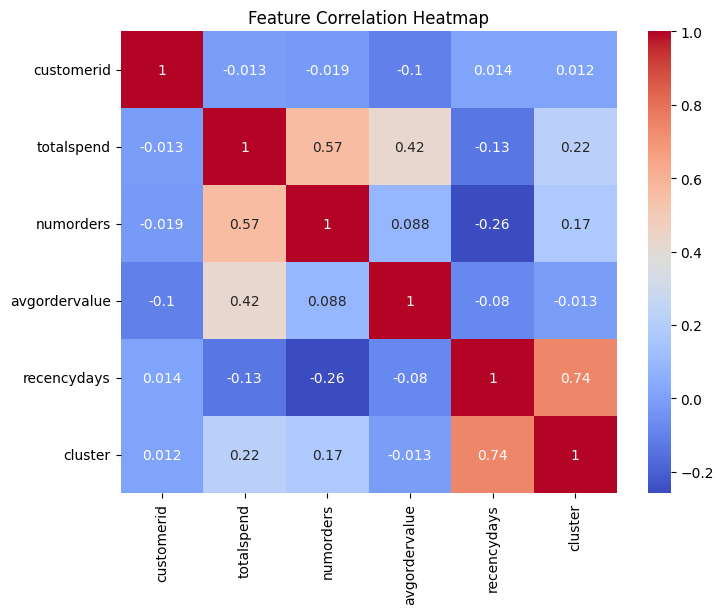

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(customer_clusters.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
{
"cells": [
{
"cell_type": "markdown",
"metadata": {},
"source": "## 7️⃣ Consolidated Cluster Analysis Visualization"
},
{
"cell_type": "code",
"metadata": {},
"source": "plt.figure(figsize=(10,7))\n\n# Scatter: TotalSpend vs RecencyDays\n# Color = Cluster, Size = CLV, Style = Churn_Risk\nsns.scatterplot(\n    x='TotalSpend',\n    y='RecencyDays',\n    hue='Cluster',\n    size='CLV',\n    style='Churn_Risk',\n    data=customer_clusters,\n    palette='tab10',\n    sizes=(20, 300),\n    alpha=0.7\n)\n\nplt.title('Customer Segments with CLV and Churn Risk')\nplt.xlabel('Total Spend')\nplt.ylabel('Recency (days)')\nplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)\nplt.show()"
},
{
"cell_type": "markdown",
"metadata": {}


{'cells': [{'cell_type': 'markdown',
   'metadata': {},
   'source': '## 4️⃣ Advanced Analysis: RFM Segmentation, CLV, and Churn Risk'},
  {'cell_type': 'code',
   'metadata': {},
   'source': "# --- RFM Segmentation ---\n# Define quartiles for RFM metrics\ncustomer_clusters['R_Score'] = pd.qcut(customer_clusters['RecencyDays'], 4, labels=[4,3,2,1])\ncustomer_clusters['F_Score'] = pd.qcut(customer_clusters['NumOrders'], 4, labels=[1,2,3,4])\ncustomer_clusters['M_Score'] = pd.qcut(customer_clusters['TotalSpend'], 4, labels=[1,2,3,4])\n\n# Combine into RFM segment\ncustomer_clusters['RFM_Segment'] = (\n    customer_clusters['R_Score'].astype(str) + \n    customer_clusters['F_Score'].astype(str) + \n    customer_clusters['M_Score'].astype(str)\n)\n\n# Create descriptive labels\ndef rfm_label(row):\n    if row['R_Score']==4 and row['F_Score']==4 and row['M_Score']==4:\n        return 'Best Customers'\n    elif row['R_Score']>=3 and row['F_Score']>=3:\n        return 'Loyal Customers'\n    

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load customer cluster data
customer_clusters = pd.read_csv("data/processed/features/customer_segments.csv")
customer_clusters.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/processed/features/customer_segments.csv'